In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
temp_dir0 = 'gdrive/MyDrive/CV_CW_temp/LeNet/0'
temp_dir1 = 'gdrive/MyDrive/CV_CW_temp/LeNet/1'
temp_dir2 = 'gdrive/MyDrive/CV_CW_temp/LeNet/2'
temp_dir3 = 'gdrive/MyDrive/CV_CW_temp/LeNet/3'
temp_dir4 = 'gdrive/MyDrive/CV_CW_temp/LeNet/4'
temp_dir5 = 'gdrive/MyDrive/CV_CW_temp/LeNet/5'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# importing of modules for CNN 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.regularizers import Regularizer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import os 
import tensorflow as tf
from tensorflow.keras.models import load_model 
import json

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [ ]:
# seed for reproducibility
np.random.seed(1)  

# network and training parameters
N_EPOCH = 50
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
NET = 3
DATA_AUG = True

IMG_ROWS, IMG_COLS = 32, 32 # input dimensions of images
N_CLASSES = 10  # number of outputs = number of classes
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 3) # 1st Dimension, 2nd Dimension, RGB channel

print('Main variables initialised.')

Main variables initialised.


In [ ]:
if NET == 1:
  temp_dir = temp_dir1
elif NET == 2:
  temp_dir = temp_dir2
elif NET == 3:
  temp_dir = temp_dir3
elif NET == 4:
  temp_dir = temp_dir4
elif NET == 5:
  temp_dir = temp_dir5
elif NET == 0:
  temp_dir = temp_dir0
else:
  temp_dir = None

In [ ]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# K.set_image_dim_ordering("th")

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

# we need a 60K x [3 x 32 x 32] shape as input to the CONVNET
# X_train = X_train[:, :, :, np.newaxis]
# X_test = X_test[:, :, :, np.newaxis]

# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, N_CLASSES)
y_test = utils.to_categorical(y_test, N_CLASSES)

print(X_train.shape, 'X train shape')
print(X_test.shape, 'X test shape')
print(y_train.shape, 'y train shape')
print(y_test.shape, 'y test shape')

(50000, 32, 32, 3) X train shape
(10000, 32, 32, 3) X test shape
(50000, 10) y train shape
(10000, 10) y test shape


In [ ]:
if DATA_AUG == True:
  ig = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, validation_split=VALIDATION_SPLIT)
  da_iterator_train = ig.flow(X_train, y_train, batch_size=BATCH_SIZE, subset='training')
  da_iterator_val = ig.flow(X_train, y_train, batch_size=int(BATCH_SIZE*VALIDATION_SPLIT), subset='validation')
  da_steps = int(X_train.shape[0] / BATCH_SIZE)
  print(da_steps)

390


## Net0
2 CNN.

In [ ]:
#define the convnet 
class Net0:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(25, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', input_shape=input_shape))
		model.add(Conv2D(25, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu'))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(50, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu'))
		model.add(Conv2D(50, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu'))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
        
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(400, activation='tanh'))
 
		# a softmax classifier
		model.add(Dense(classes, activation='softmax'))

		return model

print('Net0 class defined.')

Net0 class defined.


## Net1
3 CNNs

In [ ]:
#define the convnet 
class Net1:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(25, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', input_shape=input_shape))
		model.add(Conv2D(25, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu'))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(50, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu'))
		model.add(Conv2D(50, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu'))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  
    # CONV => RELU => POOL => Dropout
		model.add(Conv2D(100, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu'))
		model.add(Conv2D(100, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu'))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
        
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(400, activation='tanh'))
 
		# a softmax classifier
		model.add(Dense(classes, activation='softmax'))

		return model

print('Net1 class defined.')

Net1 class defined.


## Net2
3 CNNs, Regularization, Batch Normalize.

In [ ]:
#define the convnet 
class Net2:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(25, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(Conv2D(25, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(50, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(Conv2D(50, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
  
    # CONV => RELU => POOL => Dropout
		model.add(Conv2D(100, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(Conv2D(100, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
        
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(400, activation='tanh'))
 
		# a softmax classifier
		model.add(Dense(classes, activation='softmax'))

		return model

print('Net2 class defined.')

Net2 class defined.


## Net3
3 CNNs, Dropout, Regularization, Batch Normalize.

In [ ]:
#define the convnet 
class Net3:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(25, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(Conv2D(25, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
		model.add(Dropout(0.2))
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(50, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(Conv2D(50, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
		model.add(Dropout(0.2))
  
    # CONV => RELU => POOL => Dropout
		model.add(Conv2D(100, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(Conv2D(100, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
		model.add(Dropout(0.2))
        
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(400, activation='tanh'))
 
		# a softmax classifier
		model.add(Dense(classes, activation='softmax'))

		return model

print('Net3 class defined.')

Net3 class defined.


## Net4
Different dimensions.

In [ ]:
#define the convnet 
class Net4:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(30, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)))
		model.add(Conv2D(30, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
		model.add(Dropout(0.2))
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(60, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(Conv2D(60, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
		model.add(Dropout(0.3))
  
    # CONV => RELU => POOL => Dropout
		model.add(Conv2D(120, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(Conv2D(120, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
		model.add(Dropout(0.4))
        
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(480, activation='tanh'))
 
		# a softmax classifier
		model.add(Dense(classes, activation='softmax'))

		return model

print('Net4 class defined.')

Net4 class defined.


## Net5
Different dimensions.

In [ ]:
#define the convnet 
class Net5:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(20, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)))
		model.add(Conv2D(20, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
		model.add(Dropout(0.2))
        
		# CONV => RELU => POOL => Dropout
		model.add(Conv2D(40, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(Conv2D(40, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
		model.add(Dropout(0.3))
  
    # CONV => RELU => POOL => Dropout
		model.add(Conv2D(80, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(Conv2D(80, kernel_size=3, padding="same", kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.001)))
		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
		model.add(Dropout(0.4))
        
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(320, activation='tanh'))
 
		# a softmax classifier
		model.add(Dense(classes, activation='softmax'))

		return model

print('Net5 class defined.')

Net5 class defined.


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 25)        700       
                                                                 
 batch_normalization_32 (Bat  (None, 32, 32, 25)       100       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 25)        5650      
                                                                 
 batch_normalization_33 (Bat  (None, 32, 32, 25)       100       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 25)       0         
 g2D)                                                            
                                                      

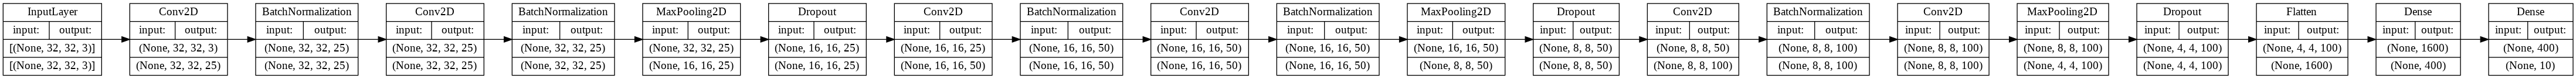

In [ ]:
# initialize the optimizer and compile the model
if NET == 1:
  model = Net1.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)
elif NET == 2:
  model = Net2.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)
elif NET == 3:
  model = Net3.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)
elif NET == 4:
  model = Net4.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)
elif NET == 5:
  model = Net5.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)
elif NET == 0:
  model = Net0.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

model.summary()

plot_model(model, to_file=temp_dir+'/model_figure.png', show_layer_activations=False, show_layer_names=False, show_shapes=True, rankdir='LR')

In [ ]:
# # additional checkpoint load code and temp directory definition
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.models import load_model

# checkpoint_path = temp_dir+"/{epoch:02d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # definition of checkpoint parameters file
# checkpoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1)

In [ ]:
# additional checkpoint load code and temp directory definition
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

checkpoint_path = temp_dir+"/weights.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# definition of checkpoint parameters file
checkpoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

In [ ]:
# training/fitting of the Net model
if DATA_AUG == False:
  history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT, callbacks=[checkpoint])
else:
  # history = model.fit_generator(da_iterator_train, epochs=N_EPOCH, steps_per_epoch=da_steps, verbose=VERBOSE, validation_split=VALIDATION_SPLIT, callbacks=[checkpoint])
  history = model.fit(da_iterator_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_data=da_iterator_val, callbacks=[checkpoint])

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 2.2415 - accuracy: 0.4105
Epoch 1: val_loss improved from inf to 2.90104, saving model to gdrive/MyDrive/CV_CW_temp/LeNet/3/weights.ckpt
INFO:tensorflow:Assets written to: gdrive/MyDrive/CV_CW_temp/LeNet/3/weights.ckpt/assets
313/313 [==============================] - 26s 80ms/step - loss: 2.2415 - accuracy: 0.4105 - val_loss: 2.9010 - val_accuracy: 0.2466
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.7177 - accuracy: 0.5469
Epoch 2: val_loss improved from 2.90104 to 1.66991, saving model to gdrive/MyDrive/CV_CW_temp/LeNet/3/weights.ckpt
INFO:tensorflow:Assets written to: gdrive/MyDrive/CV_CW_temp/LeNet/3/weights.ckpt/assets
313/313 [==============================] - 25s 80ms/step - loss: 1.7177 - accuracy: 0.5469 - val_loss: 1.6699 - val_accuracy: 0.5581
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 1.4789 - accuracy: 0.6057
Epoch 3: val_loss improved from 1.66991 to

In [ ]:
new_model = load_model(checkpoint_path)
remain_n_epoch = N_EPOCH - history.params['epochs']
if remain_n_epoch == 0:
  print("Train finished.")
else:
  new_history = new_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=remain_n_epoch, verbose=VERBOSE, validation_split=VALIDATION_SPLIT, callbacks=[checkpoint])

Train finished.


In [ ]:
s = new_model.evaluate(X_test, y_test, verbose=1)
print("\nTest score/loss:", s[0])
print('Test accuracy:', s[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.7514 - accuracy: 0.8323

Test score/loss: 0.7513584494590759
Test accuracy: 0.8323000073432922


313/313 [==============================] - 2s 5ms/step - loss: 0.7736 - accuracy: 0.8231

Test score/loss: 0.7736267447471619
Test accuracy: 0.8230999708175659
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


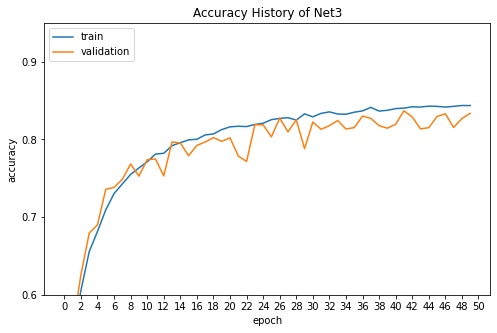

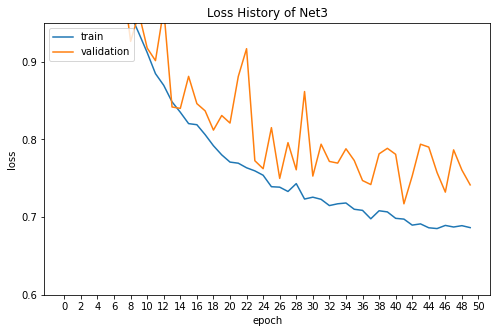

In [ ]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy History of Net' + str(NET))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(0, N_EPOCH+1, 2.0))
plt.yticks(np.arange(0.6, 1.0, 0.1))
plt.ylim(0.6, 0.95)
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(temp_dir+'/acc_hist.png')
plt.show()
# summarize history for loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss History of Net' + str(NET))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, N_EPOCH+1, 2.0))
plt.yticks(np.arange(0.6, 1.0, 0.1))
plt.ylim(0.6, 0.95)
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(temp_dir+'/loss_hist.png')
plt.show()

## Save Model Configures

In [ ]:
from tensorflow.keras.models import model_from_json

#Creation of of the model configuration in jsom format
model_json = model.to_json()

#save model in json format into a file
open(temp_dir+'/Net_architecture.json', 'w').write(model_json)

print('Model definition jsom file saved.')

#model reconstruction from json format
model = model_from_json(model_json)


# Now let's compile, summarise and then train/fit the model.
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

model.summary()

Model definition jsom file saved.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 25)        700       
                                                                 
 batch_normalization_32 (Bat  (None, 32, 32, 25)       100       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 25)        5650      
                                                                 
 batch_normalization_33 (Bat  (None, 32, 32, 25)       100       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 25)       0         
 g2D)                                                            
                    

## Save Model Weights

In [ ]:
#This saves the weights at the last epoch of the previous training session
model.save(temp_dir+'/weights.final')
print ('Weights saved for final epoch ', N_EPOCH)
print ('Check that there is a weight file in your folder')

INFO:tensorflow:Assets written to: gdrive/MyDrive/CV_CW_temp/LeNet/3/weights.final/assets
Weights saved for final epoch  50
Check that there is a weight file in your folder


## Load Model

In [ ]:
#This loads the weight file
model = load_model(temp_dir+'/weights.ckpt')
print ('Loading of the saved weights and test using these trained weights')

# let's check that the weighst loaded in this examples have kept the trained state of the network.
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# Save scores
with open(temp_dir+'/score.json', 'w') as f:
    json.dump(score, f)

Loading of the saved weights and test using these trained weights
313/313 [==============================] - 2s 4ms/step - loss: 0.7514 - accuracy: 0.8323

Test score/loss: 0.7513584494590759
Test accuracy: 0.8323000073432922


## Checkpoint Saving

In [ ]:
# # additional checkpoint load code and temp directory definition
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.models import load_model 

# # let's reduce the number of epoch to 3, for a faster test of the checkpoint utility
# N_EPOCH = 3


# # definition of checkpoint parameters file
# checkpoint = ModelCheckpoint(temp_dir+"1-{epoch:02d}.weights")

# print ('Training with checkpoint at each epoch. Check that at the end of each epoch, there is a weight file in the tmp folder')
# model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=0.5, callbacks=[checkpoint])

# score = model.evaluate(X_test, y_test, verbose=VERBOSE)
# print("\nTest score/loss:", score[0])
# print('Test accuracy:', score[1])

# # Let's load the weights of the 2nd epoch, and check the scores 
# model = load_model(temp_dir+'1-02.weights')
# print ('Weights loaded for epoch 2 .')
# print ('New test using these trained weights.')

# # let's check that the weights loaded in this examples have kept the trained state of the network.
# score = model.evaluate(X_test, y_test, verbose=VERBOSE)
# print("\nTest score/loss:", score[0])
# print('Test accuracy:', score[1])